In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.stats import pearsonr
from pyaml_env import parse_config, BaseConfig
from my_utils.neural_data import get_tripleN_reliability
from my_utils.alignment_metrics import partial_correlation
from my_utils.model_helpers import init_vgg, get_layer_names, get_nice_layer_names

## Untrained Inits Neural Predictivity and RSA

In [2]:
predictivity_path = './expt_results/neural_predictivity'
regimes = [n.split('.csv')[0] for n in os.listdir(predictivity_path)]

if "uniform" in regimes: 
    regimes.remove("uniform")
    regimes.append("uniform")
if "trained" in regimes:
    regimes.remove("trained")
    regimes.append("trained")
vgg_model = init_vgg()
vgg_layer_names = get_layer_names(vgg_model)

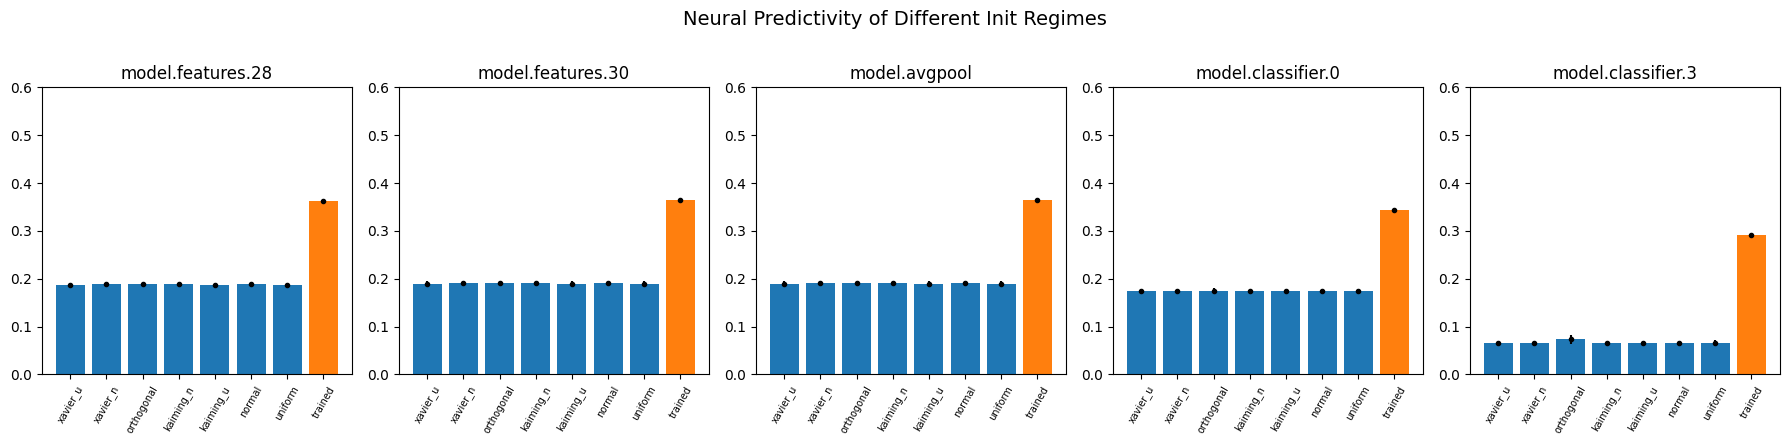

In [3]:
# Predictivity of last n layers across regimes
last_n_layers = 5
layers_to_plot = vgg_layer_names[len(vgg_layer_names)-last_n_layers:]

fig = plt.figure(figsize=(18,4))
for li, ln in enumerate(layers_to_plot):
    plt.subplot(1,last_n_layers,li+1)
    plt.title(ln)
    y_vals = []
    y_errs = []
    x_vals = []
    bar_colors = []
    for ri, rn in enumerate(regimes):
        pred_data = pd.read_csv(f'{predictivity_path}/{rn}.csv', index_col=0).to_numpy() # (n_seeds, n_layers)
        layer_pred_mean = np.mean(pred_data[:, len(vgg_layer_names)-last_n_layers+li], axis=0)
        layer_pred_sd = np.std(pred_data[:, len(vgg_layer_names)-last_n_layers+li], axis=0)
        y_vals.append(layer_pred_mean)
        y_errs.append(layer_pred_sd)
        x_vals.append(rn)
        bar_colors.append("tab:orange" if "trained" in rn else "tab:blue")

    plt.bar(x_vals, y_vals, color=bar_colors)
    plt.errorbar(x_vals, y_vals, y_errs, fmt=".", color="k")
    plt.ylim([0, 0.6])
    plt.xticks(rotation=60, fontsize=7)

plt.tight_layout()
plt.suptitle("Neural Predictivity of Different Init Regimes", fontsize=14, y=1.1)
plt.show()
   

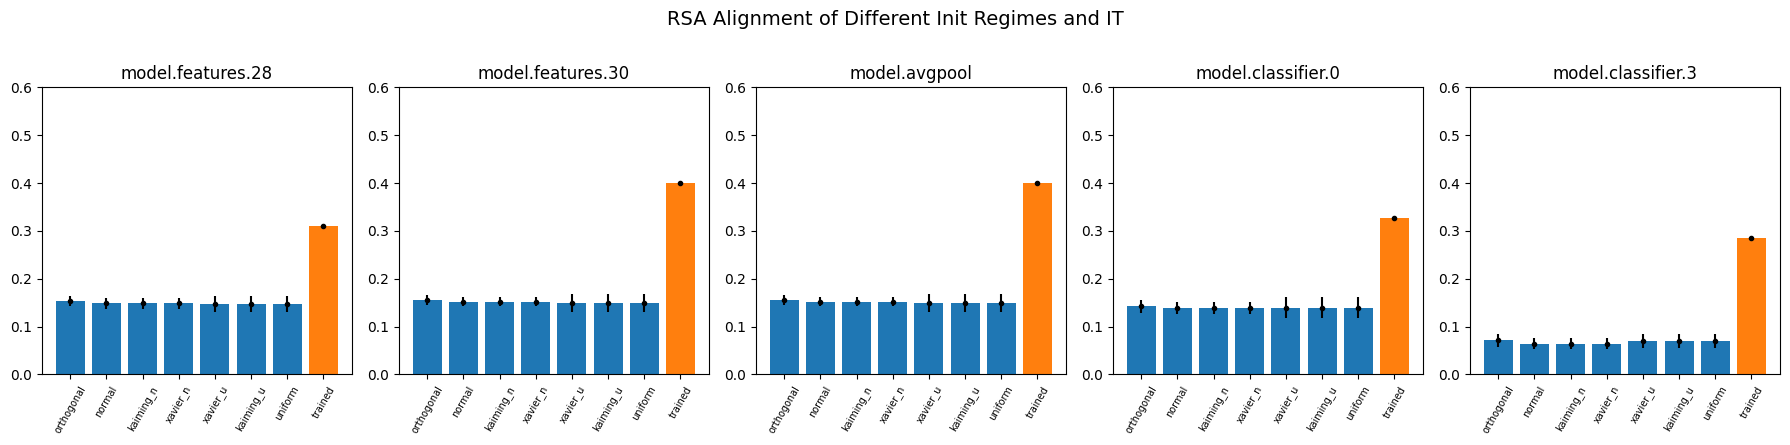

In [40]:
# Predictivity of last n layers across regimes
last_n_layers = 5
layers_to_plot = vgg_layer_names[len(vgg_layer_names)-last_n_layers:]
rsa_path = './expt_results/rsa'
fig = plt.figure(figsize=(18,4))
for li, ln in enumerate(layers_to_plot):
    plt.subplot(1,last_n_layers,li+1)
    plt.title(ln)
    y_vals = []
    y_errs = []
    x_vals = []
    bar_colors = []
    for ri, rn in enumerate(regimes):
        pred_data = pd.read_csv(f'{rsa_path}/{rn}.csv', index_col=0).to_numpy() # (n_seeds, n_layers)
        layer_pred_mean = np.mean(pred_data[:, len(vgg_layer_names)-last_n_layers+li], axis=0)
        layer_pred_sd = np.std(pred_data[:, len(vgg_layer_names)-last_n_layers+li], axis=0)
        y_vals.append(layer_pred_mean)
        y_errs.append(layer_pred_sd)
        x_vals.append(rn)
        bar_colors.append("tab:orange" if "trained" in rn else "tab:blue")

    plt.bar(x_vals, y_vals, color=bar_colors)
    plt.errorbar(x_vals, y_vals, y_errs, fmt=".", color="k")
    plt.ylim([0, 0.6])
    plt.xticks(rotation=60, fontsize=7)

plt.tight_layout()
plt.suptitle("RSA Alignment of Different Init Regimes and IT", fontsize=14, y=1.1)
plt.show()
   

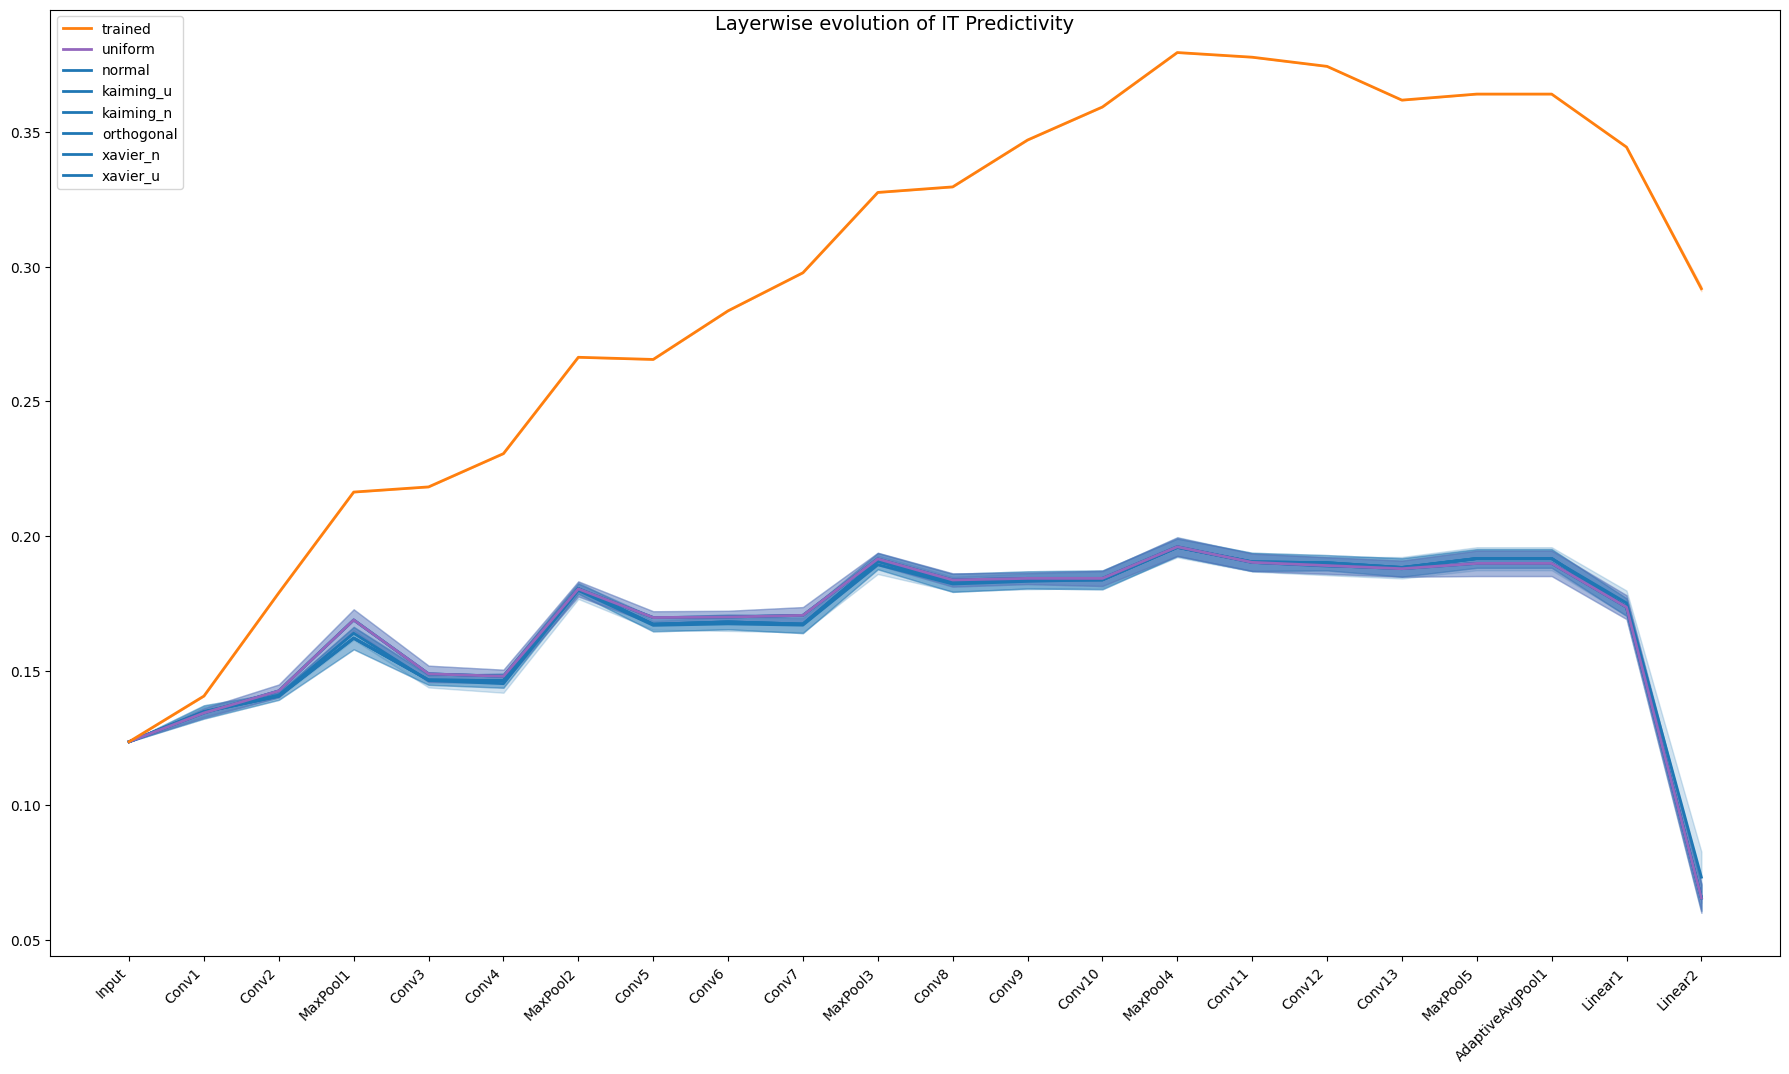

In [4]:
# layerwise evolution of all regimes


fig = plt.figure(figsize=(18,10))

non_trained = [rn for rn in regimes if "trained" not in rn]
nice_layer_names = get_nice_layer_names(vgg_model, vgg_layer_names)
for ri, rn in enumerate(regimes):
    y_vals = []
    y_errs = []
    pred_data = pd.read_csv(f'{predictivity_path}/{rn}.csv', index_col=0).to_numpy() # (n_seeds, n_layers)
    if "trained" in rn:
        color = "tab:orange"
    elif "uniform" in rn:
        color = "tab:purple"
    else:
        color = "tab:blue"
        
    for li, ln in enumerate(vgg_layer_names):
        layer_pred_mean = np.mean(pred_data[:,li], axis=0)
        layer_pred_sd = np.std(pred_data[:,li], axis=0)
        y_vals.append(layer_pred_mean)
        y_errs.append(layer_pred_sd)

    plt.plot(nice_layer_names,y_vals, label=rn, color=color, linewidth=2)
    y_vals = np.array(y_vals)
    y_errs = np.array(y_errs)
    plt.fill_between(
        nice_layer_names,
            y_vals - y_errs,
            y_vals + y_errs,
            color=color,
            alpha=0.2
        )

plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.suptitle("Layerwise evolution of IT Predictivity", fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])
plt.show()


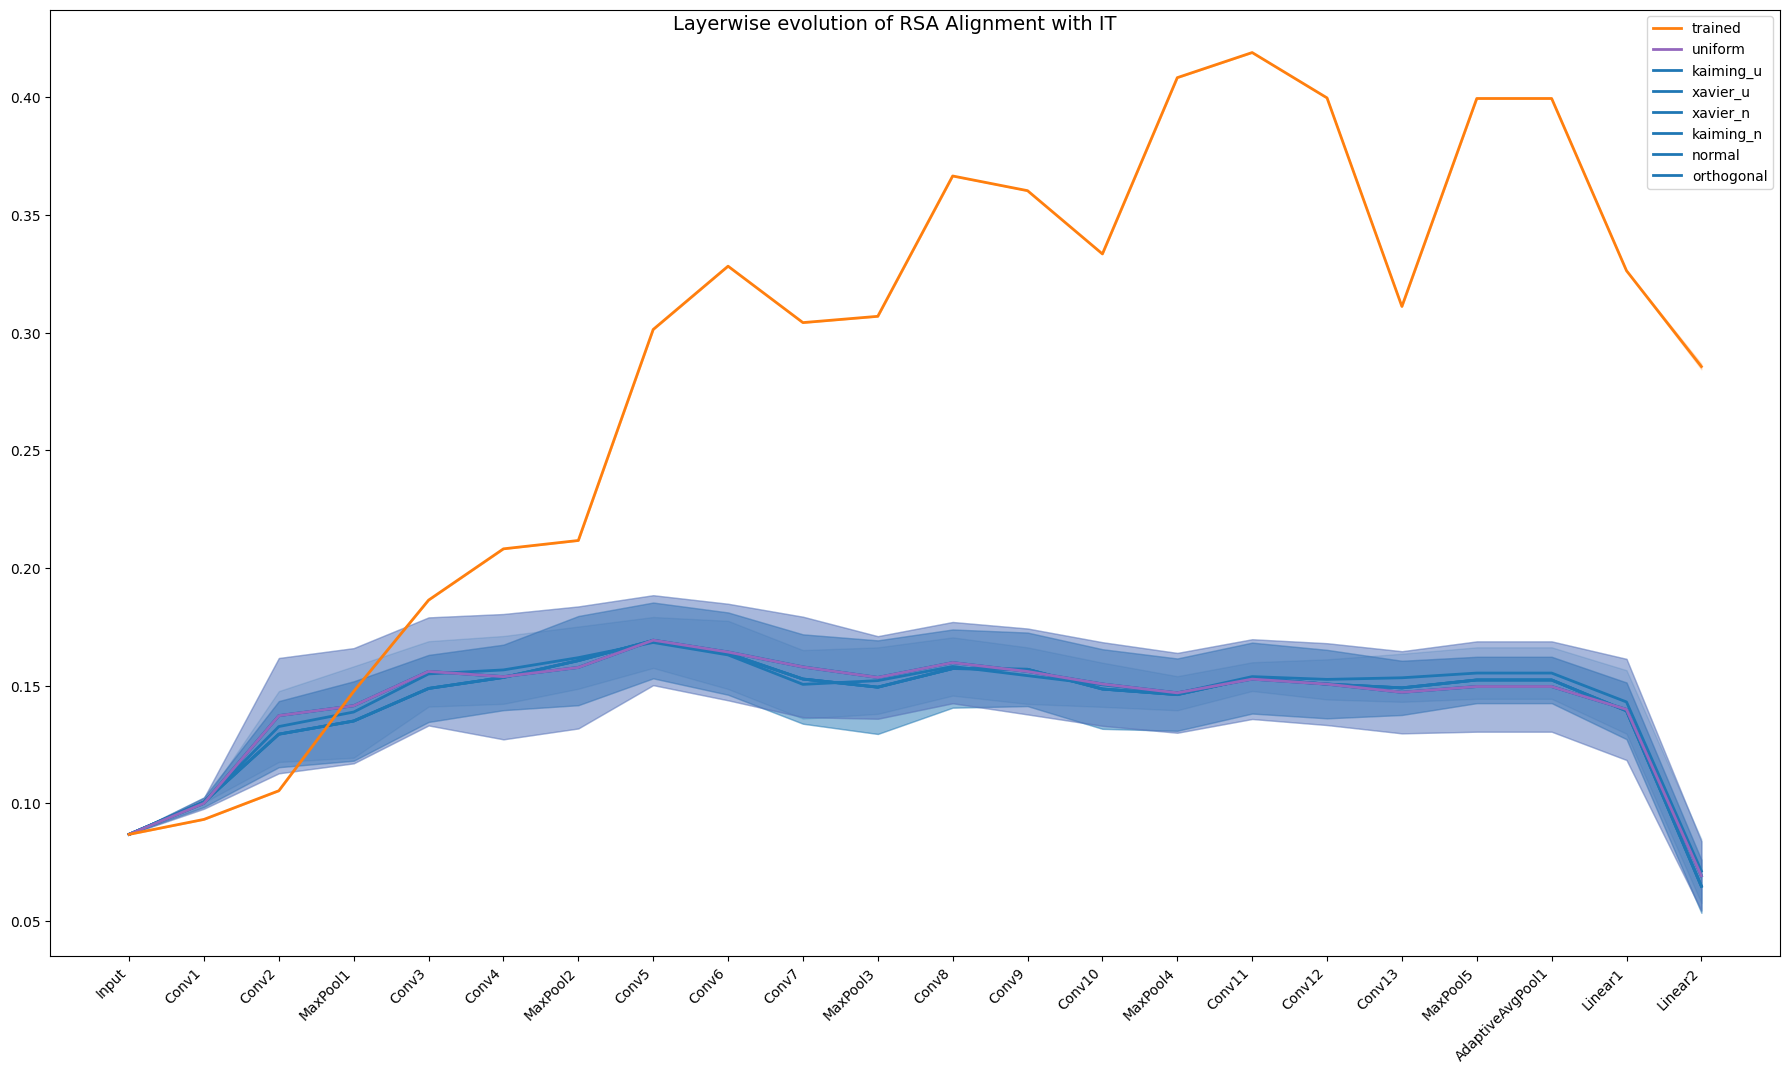

In [41]:
# layerwise evolution of all regimes for RSA


fig = plt.figure(figsize=(18,10))

non_trained = [rn for rn in regimes if "trained" not in rn]
nice_layer_names = get_nice_layer_names(vgg_model, vgg_layer_names)
for ri, rn in enumerate(regimes):
    y_vals = []
    y_errs = []
    pred_data = pd.read_csv(f'{rsa_path}/{rn}.csv', index_col=0).to_numpy() # (n_seeds, n_layers)
    if "trained" in rn:
        color = "tab:orange"
    elif "uniform" in rn:
        color = "tab:purple"
    else:
        color = "tab:blue"
        
    for li, ln in enumerate(vgg_layer_names):
        layer_pred_mean = np.mean(pred_data[:,li], axis=0)
        layer_pred_sd = np.std(pred_data[:,li], axis=0)
        y_vals.append(layer_pred_mean)
        y_errs.append(layer_pred_sd)

    plt.plot(nice_layer_names,y_vals, label=rn, color=color, linewidth=2)
    y_vals = np.array(y_vals)
    y_errs = np.array(y_errs)
    plt.fill_between(
        nice_layer_names,
            y_vals - y_errs,
            y_vals + y_errs,
            color=color,
            alpha=0.2
        )

plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.suptitle("Layerwise evolution of RSA Alignment with ITan", fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])
plt.show()


## Neuron Predictions

In [8]:
neuron_pred_path = './expt_results/neuron_corrs'
regimes = [n.split('.pkl')[0] for n in os.listdir(neuron_pred_path)]
config = BaseConfig(parse_config('../config.yaml'))
neuron_reliability = get_tripleN_reliability(config.triplen_path)

if "trained" in regimes:
    regimes.remove("trained")
    regimes.append("trained")
vgg_model = init_vgg()
vgg_layer_names = get_layer_names(vgg_model)

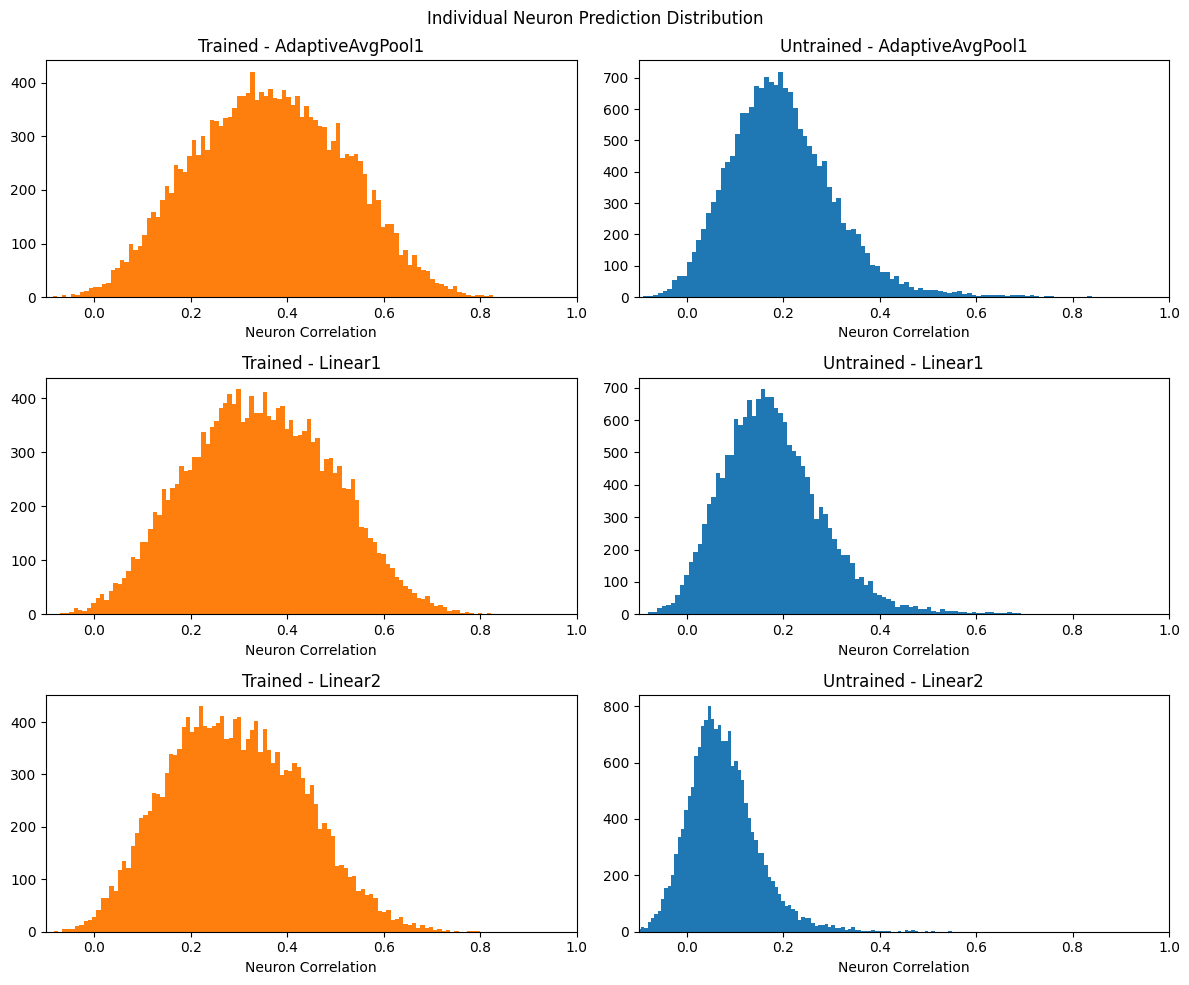

In [43]:
# neuron corr distributions
fig = plt.figure(figsize=(12,10))
last_n_layers = 3
layers_to_plot = vgg_layer_names[len(vgg_layer_names)-last_n_layers:]
trained_preds = pd.read_pickle(f'{neuron_pred_path}/trained.pkl').to_numpy()
untrained_preds = pd.read_pickle(f'{neuron_pred_path}/kaiming_n.pkl').to_numpy()

for li, ln in enumerate(layers_to_plot):
    trained_neuron_corrs = trained_preds[0, len(vgg_layer_names)-last_n_layers+li]
    untrained_neuron_corrs = untrained_preds[0, len(vgg_layer_names)-last_n_layers+li]

    plt.subplot(last_n_layers, 2, 2*li+1)
    plt.hist(trained_neuron_corrs, bins=100, color="tab:orange")
    plt.title(f"Trained - {nice_layer_names[len(vgg_layer_names)-last_n_layers+li]}")
    plt.xlabel("Neuron Correlation")
    plt.xlim([-0.1, 1])
    plt.subplot(last_n_layers, 2, 2*li+2)
    plt.hist(untrained_neuron_corrs, bins=100)
    plt.title(f"Untrained - {nice_layer_names[len(vgg_layer_names)-last_n_layers+li]}")
    plt.xlabel("Neuron Correlation")
    plt.xlim([-0.1, 1])

plt.suptitle("Individual Neuron Prediction Distribution")
plt.tight_layout()
plt.show()

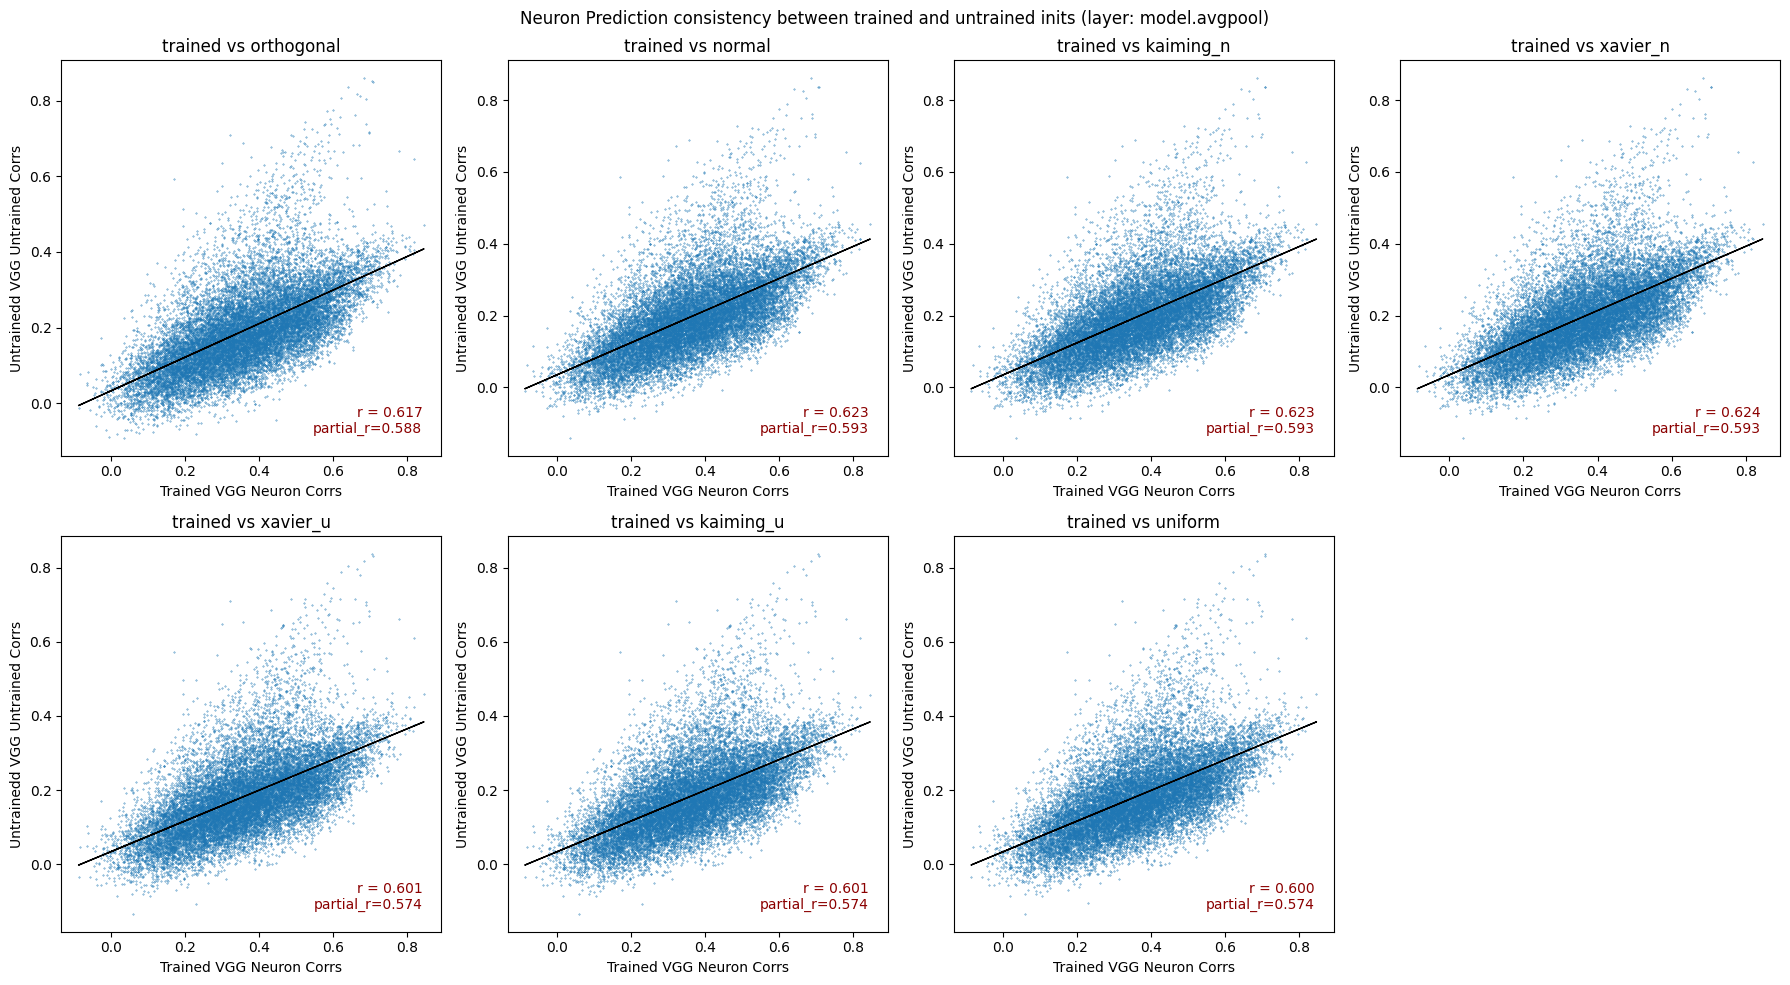

In [18]:
# Predictivity of last 
fig = plt.figure(figsize=(18,10))
layer_to_plot = 19
trained_preds = pd.read_pickle(f'{neuron_pred_path}/trained.pkl').to_numpy() #(n_seeds, n_layers), each cell is a list of neuron corrs
trained_preds = trained_preds[0, layer_to_plot] # take first seed and layer of choice

for ri, rn in enumerate(regimes[:-1]):
    plt.subplot(2, 4, ri+1)
    untrained_preds = pd.read_pickle(f'{neuron_pred_path}/{rn}.pkl').to_numpy() #(n_seeds, n_layers), each cell is a list of neuron corrs
    untrained_preds = untrained_preds[0, layer_to_plot]
    plt.scatter(trained_preds, untrained_preds, s=0.1)
    r, p = pearsonr(trained_preds, untrained_preds)
    slope, intercept = np.polyfit(trained_preds, untrained_preds, 1)
    line = slope * np.array(trained_preds) + intercept
    plt.plot(trained_preds, line, color='black', linewidth=1)

    # partial corr
    p_corr = partial_correlation(trained_preds, untrained_preds, np.array(neuron_reliability))
    
    plt.text(0.95, 0.05, f"r = {r:.3f}\npartial_r={p_corr:.3f}",
             transform=plt.gca().transAxes,
             ha='right', va='bottom',
             fontsize=10, color='darkred')
    
    plt.title(f"trained vs {rn}")
    plt.xlabel("Trained VGG Neuron Corrs")
    plt.ylabel("Untrainedd VGG Untrained Corrs")

plt.suptitle(f"Neuron Prediction consistency between trained and untrained inits (layer: {vgg_layer_names[layer_to_plot]})")
plt.tight_layout()
plt.show()
    

   